In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections
from os import listdir
%matplotlib inline
%run '/home/ihs3/Documents/Notebooks/rct008_import_getters.ipynb'
%run '/home/ihs3/Documents/Notebooks/import_plots.ipynb'

In [59]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    

# RCT008

In [63]:
dataBase = 'rct008'
eventsDf = getEvents(dataBase)
eventsDf

/home/ihs3/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:81: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/home/ihs3/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:83: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/home/ihs3/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:85: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


,,,Start_Time,Stop_Time,Power,Gas,Pressure
eventId,dataBase,run,,,,,
0,rct008,002,2016-09-02 20:53:22.656483,2016-09-02 21:23:25.001846,0W,Helium,1
1,rct008,002,2016-09-02 23:23:34.822606,2016-09-02 23:53:37.056826,50W,Helium,1
2,rct008,002,2016-09-03 01:23:44.482824,2016-09-03 01:53:46.589858,100W,Helium,1
3,rct008,002,2016-09-03 03:23:53.809033,2016-09-03 03:53:56.234947,150W,Helium,1
4,rct008,002,2016-09-03 05:14:03.260932,2016-09-03 05:44:05.493683,200W,Helium,1
5,rct008,002,2016-09-03 07:04:12.197388,2016-09-03 07:34:14.433757,250W,Helium,1
6,rct008,002,2016-09-03 10:54:30.246108,2016-09-03 11:24:32.501776,0W,Helium,1
7,rct008,002,2016-09-03 14:55:24.894030,2016-09-03 15:25:27.313742,0W,Helium,10
8,rct008,002,2016-09-03 17:25:37.353149,2016-09-03 17:55:39.565753,50W,Helium,10


In [64]:
def findInputPower(eventTuple):
    CurrentSensor = 'v1'
    lineVoltageSensor = 'v4'
    
    datetime, lineVoltage = getEngData(lineVoltageSensor, eventTuple)
    datetime, fanCurrent = getEngData(CurrentSensor, eventTuple)
    
    PowerIn = np.mean(lineVoltage*fanCurrent)
    
    return PowerIn

def Temperatures(eventTuple):
    AmbientRTDs = ['amb_rtd1','amb_rtd2']
    ColdRTDs = ['rct_rtd1','rct_rtd2','rct_rtd9','rct_rtd10']
    WarmRTDs = ['rct_rtd3','rct_rtd4','rct_rtd7','rct_rtd8']
    HotRTDs = ['rct_rtd5','rct_rtd6']
    
    [date, Amb1] = getEngData(AmbientRTDs[0],eventTuple)
    [date, Amb2] = getEngData(AmbientRTDs[1],eventTuple)
    
    [date, Cold1] = getEngData(ColdRTDs[0],eventTuple)
    [date, Cold2] = getEngData(ColdRTDs[1],eventTuple)
    [date, Cold3] = getEngData(ColdRTDs[2],eventTuple)
    [date, Cold4] = getEngData(ColdRTDs[3],eventTuple)
    
    [date, Warm1] = getEngData(WarmRTDs[0],eventTuple)
    [date, Warm2] = getEngData(WarmRTDs[1],eventTuple)
    [date, Warm3] = getEngData(WarmRTDs[2],eventTuple)
    [date, Warm4] = getEngData(WarmRTDs[3],eventTuple)
    
    [date, Hot1] = getEngData(HotRTDs[0],eventTuple)
    [date, Hot2] = getEngData(HotRTDs[1],eventTuple)
    
    a = np.mean((Amb1+Amb2)*0.5)
    c1 = Cold1.mean()
    c2 = Cold2.mean()
    c3 = Cold2.mean()
    c4 = Cold4.mean()
    w1 = Warm1.mean()
    w2 = Warm2.mean()
    w3 = Warm2.mean()
    w4 = Warm4.mean()
    h1 = Hot1.mean()
    h2 = Hot2.mean()
    
    return a, c1, c2, c3, c4, w1, w2, w3, w4, h1, h2

In [65]:
eventTuple = eventsDf.index
# Ambient is the average of the two ambient rtds
# Cold is the average of the four outter rtds minus Ambient, then the mean is taken
# Warm is the average of the four middle rtds minus Ambient, then the mean is taken
# ColdWarm is the average of the eight non-center rtds minus Ambient, then the mean is taken
# Hot is the average of the two center rtds minus Ambient, then the mean is taken
powerIn = []
a = []
c1 = []
c2 = []
c3 = []
c4 = []
w1 = []
w2 = []
w3 = []
w4 = []
h1 = []
h2 = []

for eventTup in eventTuple:
    powerIn.append(findInputPower(eventTup))
    temp = (Temperatures(eventTup))
    a.append(temp[0])
    c1.append(temp[1])
    c2.append(temp[2])
    c3.append(temp[3])
    c4.append(temp[4])
    w1.append(temp[5])
    w2.append(temp[6])
    w3.append(temp[7])
    w4.append(temp[8])
    h1.append(temp[9])
    h2.append(temp[10])
    

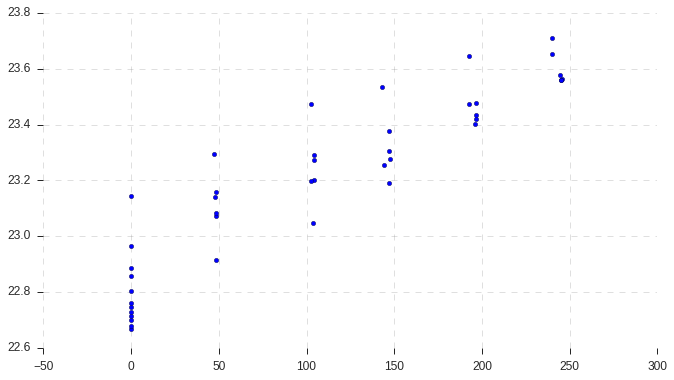

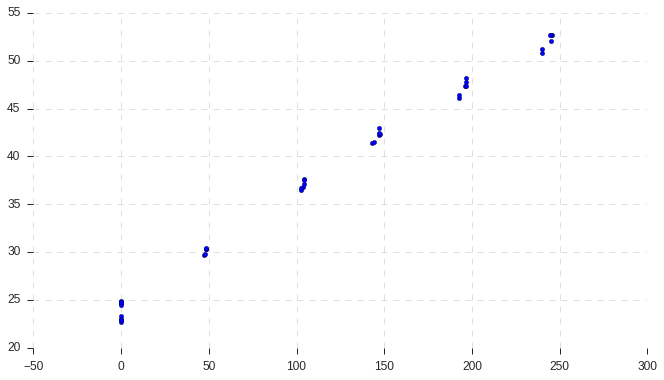

In [66]:
pscatter(powerIn, a);
pscatter(powerIn, c1);


# ALL DATA

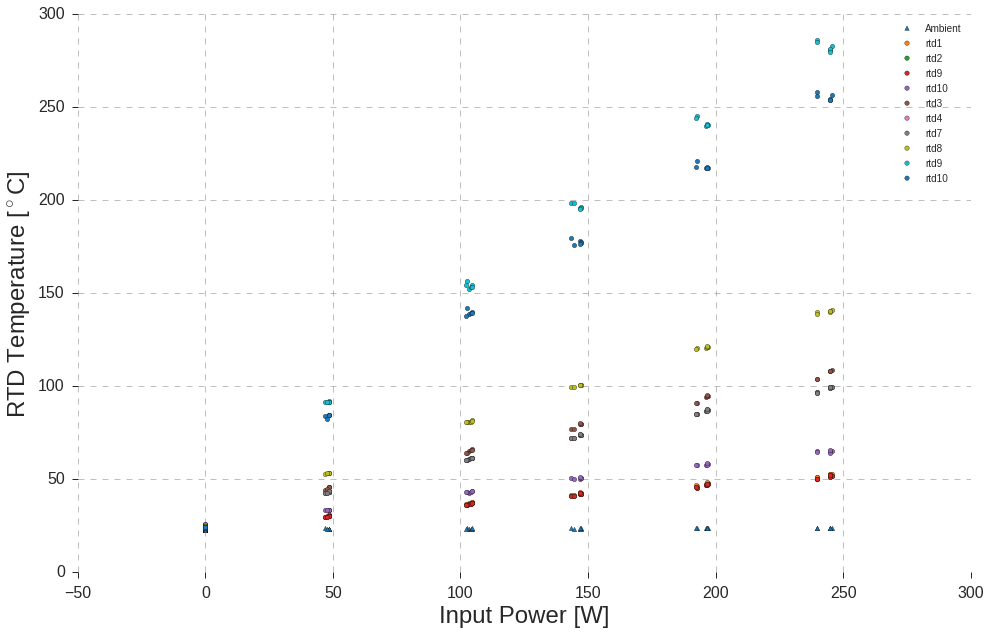

In [67]:
sns.set_style("white")
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(16, 10))


plt.scatter(powerIn, a, c=tableau20[0], marker='^')
plt.scatter(powerIn, c1, c=tableau20[2]);
plt.scatter(powerIn, c2, c=tableau20[4]);
plt.scatter(powerIn, c3, c=tableau20[6]);
plt.scatter(powerIn, c4, c=tableau20[8]);
plt.scatter(powerIn, w1, c=tableau20[10]);
plt.scatter(powerIn, w2, c=tableau20[12]);
plt.scatter(powerIn, w3, c=tableau20[14]);
plt.scatter(powerIn, w4, c=tableau20[16]);
plt.scatter(powerIn, h1, c=tableau20[18]);
plt.scatter(powerIn, h2, c=tableau20[0]);


plt.tick_params(axis='y', labelsize=16)
plt.tick_params(which='major', axis='x', labelsize=16)
plt.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=1)
plt.grid(axis='x',color='grey', linestyle='--', lw=0.5, alpha=1)
sns.despine(trim=True, left=True, bottom=True)

plt.xlabel('Input Power [W]', fontsize = 24)
plt.ylabel('RTD Temperature [$^\circ$C]', fontsize = 24)
plt.legend(['Ambient', 'rtd1', 'rtd2', 'rtd9', 'rtd10', 'rtd3', 'rtd4', 'rtd7', 'rtd8', 'rtd9', 'rtd10'])


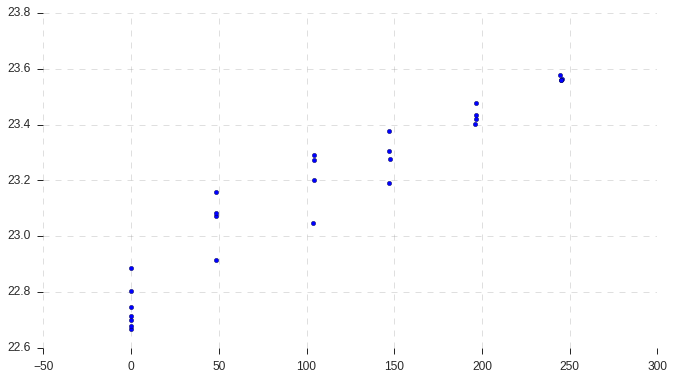

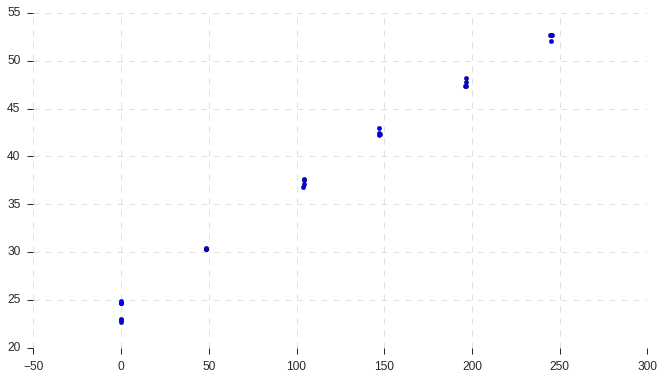

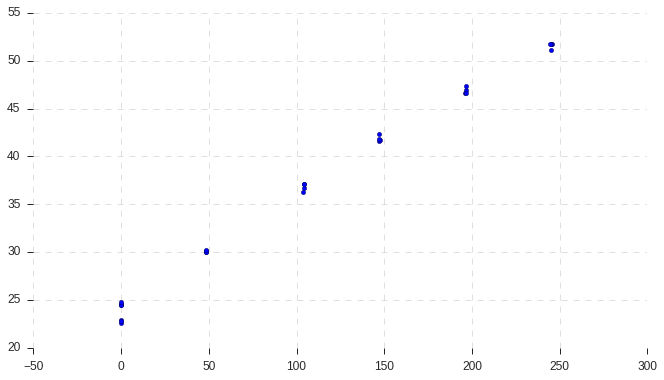

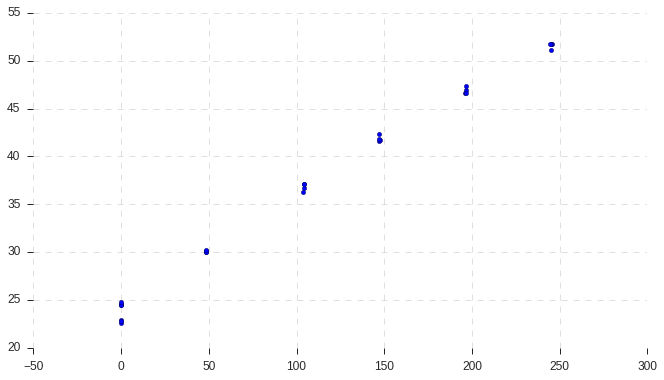

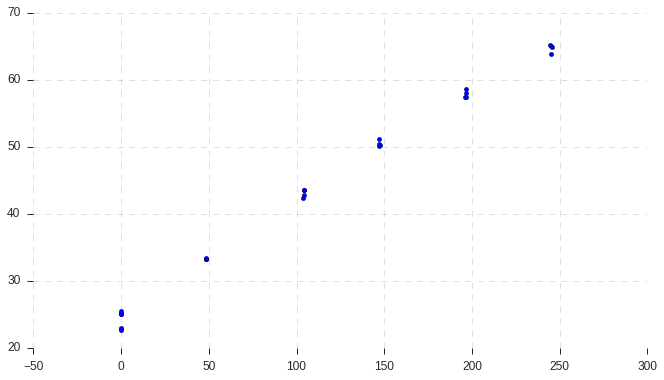

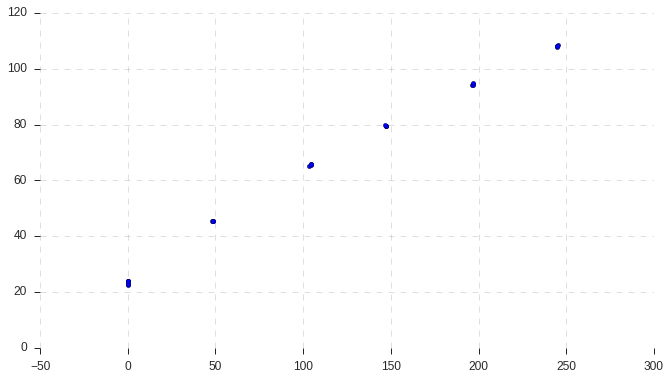

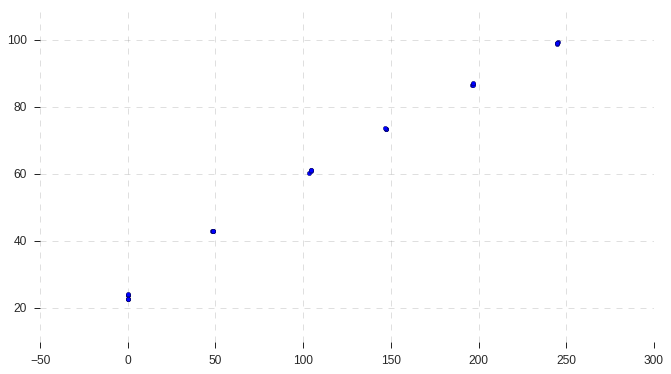

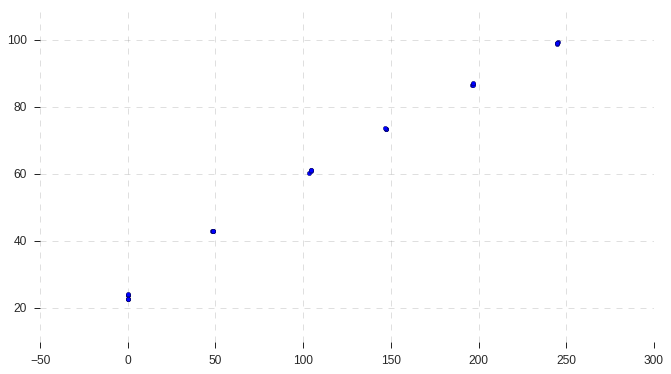

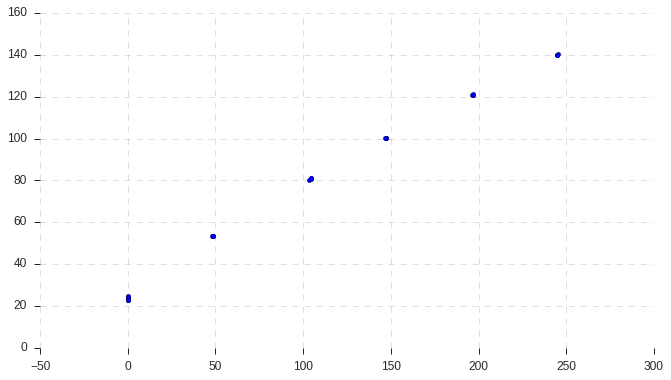

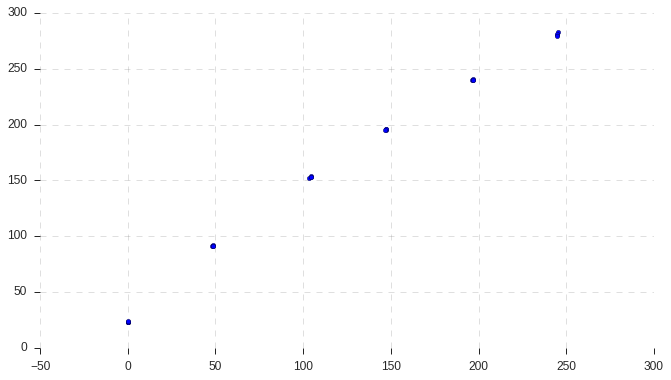

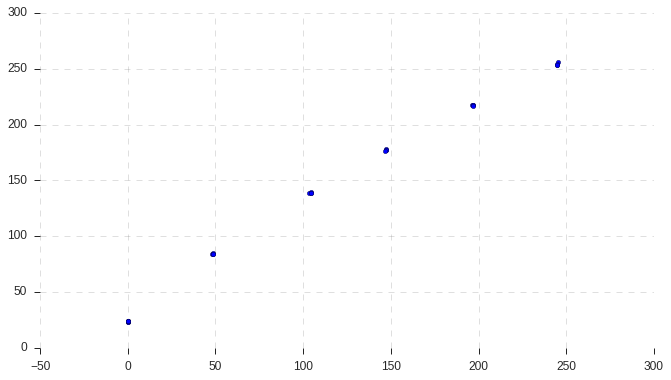

In [37]:
pscatter(powerIn, a);
pscatter(powerIn, c1);
pscatter(powerIn, c2);
pscatter(powerIn, c3);
pscatter(powerIn, c4);
pscatter(powerIn, w1);
pscatter(powerIn, w2);
pscatter(powerIn, w3);
pscatter(powerIn, w4);
pscatter(powerIn, h1);
pscatter(powerIn, h2);
